In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

# отключим вывод варнингов
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('stud_math.xls')

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [5]:
df.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [24]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [25]:
#переименуем колонки
df.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'mother_edu', 'father_edu',
                     'mother_job', 'father_job', 'reason', 'guardian', 'traveltime', 'studytime',
                     'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                     'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
                     'freetime', 'goout', 'health', 'absences', 'score']

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   pstatus              350 non-null    object 
 6   mother_edu           392 non-null    float64
 7   father_edu           371 non-null    float64
 8   mother_job           376 non-null    object 
 9   father_job           359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [28]:
#Просмотрим все колонки на предмет пропущенных значений, некорректных строковых величин и т.п. 
# school
display(df.school.value_counts())
display(df.school.unique())

GP    349
MS     46
Name: school, dtype: int64

array(['GP', 'MS'], dtype=object)

In [29]:
# sex
display(df.sex.value_counts())
display(df.sex.unique())

F    208
M    187
Name: sex, dtype: int64

array(['F', 'M'], dtype=object)

In [31]:
# age
pd.DataFrame(df.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


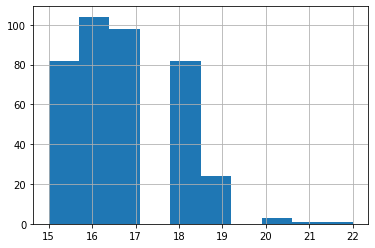

In [60]:
# нет значений NAN
# посмотрим распределение признака в столбце
df.age.hist()

In [61]:
# посмотрим границы выбросов
median = df.age.median()
IQR = df.age.quantile(0.75) - df.age.quantile(0.25)
perc25 = df.age.quantile(0.25)
perc75 = df.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


In [63]:
# видим значение, которое лежит за границами выброса - 22 года. Удалим его.
df = df.loc[df.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [32]:
# проверим address на пустые значения
pd.DataFrame(df.address.value_counts())
# заменим U на urban и R на region
df.address = df.address.apply(lambda x: 'urban' if x == 'U' else 'region' if x == 'R' else x)
display(df.address.unique())

array(['urban', nan, 'region'], dtype=object)

In [33]:
# проверим famsize на пустые значения
pd.DataFrame(df.famsize.value_counts())
# заменим LE3 на less_3 и GT3 на greater_3
df.famsize = df.famsize.apply(lambda x: 'less_3' if x == 'LE3' else 'greater_3' if x == 'GT3' else x)
display(df.famsize.unique())

array([nan, 'greater_3', 'less_3'], dtype=object)

In [35]:
# проверим pstatus на пустые значения
pd.DataFrame(df.pstatus.value_counts())
# заменим T на together и  A на apart
df.pstatus = df.pstatus.apply(lambda x: 'together' if x == 'T' else 'apart' if x == 'A' else x)
display(df.pstatus.unique())

array(['apart', nan, 'together'], dtype=object)

In [36]:
# проверим mother_edu на пустые значения
pd.DataFrame(df.mother_edu.value_counts())
df.mother_edu.unique()

array([ 4.,  1.,  3.,  2., nan,  0.])

count    391.000000
mean       2.749361
std        1.099461
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: mother_edu, dtype: float64

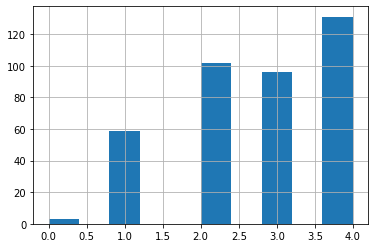

In [64]:
# посмотрим распределение признака в столбце
df.mother_edu.hist()
df.mother_edu.describe() 

In [65]:
# посмотрим границы выбросов
median = df.mother_edu.median()
IQR = df.mother_edu.quantile(0.75) - df.mother_edu.quantile(0.25)
perc25 = df.mother_edu.quantile(0.25)
perc75 = df.mother_edu.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
# выбросов нет

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


In [75]:
# посмотрим колонку father_edu
pd.DataFrame(df.father_edu.value_counts())
df.father_edu.unique()

array([ 4.,  1.,  2.,  3., nan,  0.])

In [76]:
# заменим 40 на 4, т.к. скорее всего это опечатка
df.father_edu = df.father_edu.apply(lambda x: 4. if x == 40. else x)
pd.DataFrame(df.father_edu.value_counts())

C:\Users\CSTREZNIAL\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,father_edu
2.0,106
3.0,96
4.0,89
1.0,77
0.0,2


count    370.000000
mean       2.521622
std        1.087409
min        0.000000
25%        2.000000
50%        2.500000
75%        3.000000
max        4.000000
Name: father_edu, dtype: float64

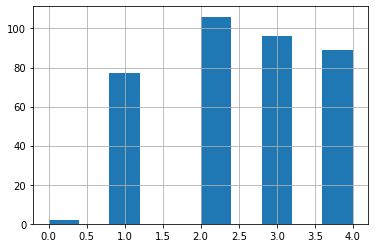

In [72]:
# посмотрим распределение признака в столбце
df.father_edu.hist()
df.father_edu.describe() 

In [73]:
# посмотрим границы выбросов
median = df.father_edu.median()
IQR = df.father_edu.quantile(0.75) - df.mother_edu.quantile(0.25)
perc25 = df.father_edu.quantile(0.25)
perc75 = df.father_edu.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
# значение 0 является выбросом (отсутствие образования)

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


In [39]:
# посмотрим колонку mother_job
pd.DataFrame(df.mother_job.value_counts())

,mother_job
other,133
services,98
at_home,58
teacher,55
health,32


In [40]:
# посмотрим колонку father_job
pd.DataFrame(df.father_job.value_counts())

,father_job
other,197
services,102
teacher,29
at_home,16
health,15


In [41]:
# посмотрим колонку reason на предмет пустых значений
pd.DataFrame(df.reason.value_counts())
df.reason.unique()

array(['course', 'other', 'home', 'reputation', nan], dtype=object)

In [42]:
# посмотрим колонку guardian на предмет пустых значений
pd.DataFrame(df.guardian.value_counts())
df.guardian.unique()

array(['mother', 'father', 'other', nan], dtype=object)

In [43]:
# посмотрим колонку traveltime на предмет пустых значений
pd.DataFrame(df.traveltime.value_counts())
df.traveltime.unique()

array([ 2.,  1.,  3., nan,  4.])

count    366.000000
mean       1.439891
std        0.694751
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

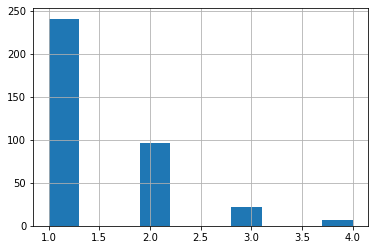

In [78]:
# посмотрим распределение признака в столбце 
df.traveltime.hist()
df.traveltime.describe() 
# большинство учеников живёт недалеко от школы.

In [79]:
# посмотрим границы выбросов
median = df.traveltime.median()
IQR = df.traveltime.quantile(0.75) - df.traveltime.quantile(0.25)
perc25 = df.traveltime.quantile(0.25)
perc75 = df.traveltime.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


In [80]:
df.traveltime.value_counts()

1.0    241
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

За границей выброса 7 учеников. Возможно длительность пути до школы влияет на успеваемость, не буду удалять данное значение.

In [44]:
# просмотрим колонку studytime на предмет пустых значений
pd.DataFrame(df.studytime.value_counts())
df.studytime.unique()

array([ 2.,  3.,  1., nan,  4.])

In [45]:
# просмотрим колонку failures на предмет пустых значений
pd.DataFrame(df.failures.value_counts())
df.failures.unique()

array([ 0.,  3., nan,  2.,  1.])

In [46]:
# посмотрим колонку schoolsup на предмет пустых значений
pd.DataFrame(df.schoolsup.value_counts())
df.schoolsup.unique()

array(['yes', 'no', nan], dtype=object)

In [47]:
# посмотрим колонку famsup на предмет пустых значений
pd.DataFrame(df.famsup.value_counts())
df.famsup.unique()

array(['no', 'yes', nan], dtype=object)

In [48]:
# посмотрим колонку paid на предмет пустых значений
pd.DataFrame(df.paid.value_counts())
df.paid.unique()

array(['no', nan, 'yes'], dtype=object)

In [49]:
# посмотрим колонку activities на предмет пустых значений
pd.DataFrame(df.activities.value_counts())
df.activities.unique()

array(['no', 'yes', nan], dtype=object)

In [50]:
# посмотрим колонку nursery на предмет пустых значений
pd.DataFrame(df.nursery.value_counts())
df.nursery.unique()

array(['yes', 'no', nan], dtype=object)

In [51]:
# посмотрим колонку higher на предмет пустых значений
pd.DataFrame(df.higher.value_counts())
df.higher.unique()

array(['yes', nan, 'no'], dtype=object)

In [52]:
# посмотрим колонку internet на предмет пустых значений
pd.DataFrame(df.internet.value_counts())
df.internet.unique()

array([nan, 'yes', 'no'], dtype=object)

In [53]:
# посмотрим колонку romantic на предмет пустых значений
pd.DataFrame(df.romantic.value_counts())
df.romantic.unique()

array(['no', nan, 'yes'], dtype=object)

In [54]:
# посмотрим колонку famrel на предмет пустых значений
pd.DataFrame(df.famrel.value_counts())
df.famrel.unique()

array([ 4.,  5.,  3., nan, -1.,  2.,  1.])

In [55]:
# посмотрим колонку freetime на предмет пустых значений
pd.DataFrame(df.freetime.value_counts())
df.freetime.unique()

array([ 3.,  2.,  4.,  1.,  5., nan])

In [56]:
# посмотрим колонку goout на предмет пустых значений
pd.DataFrame(df.goout.value_counts())
df.goout.unique()

array([ 4.,  3.,  2.,  1.,  5., nan])

In [57]:
# посмотрим колонку health на предмет пустых значений
pd.DataFrame(df.health.value_counts())
df.health.unique()

array([ 3.,  5.,  1.,  2.,  4., nan])

In [58]:
# посмотрим колонку absences на предмет пустых значений
pd.DataFrame(df.absences.value_counts())
df.absences.unique()

array([  6.,   4.,  10.,   2.,   0.,  16.,  nan,  14.,   7.,   8.,  25.,
        12.,  54.,  18.,  26.,  20.,  56.,  24.,  28.,   5.,  13.,  15.,
        22.,   3., 385.,  21.,   1.,  75.,  30.,  19.,   9.,  11.,  38.,
        40.,  23.,  17., 212.])

In [59]:
# посмотрим колонку score на предмет пустых значений
pd.DataFrame(df.score.value_counts())
df.score.unique()

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  nan,  20.])

Я проверилa все колонки на пропущенные значения, обратила внимание на отличающиеся значения, исправила для лучшего понимания некоторые сокращения. Просмотрела на предмет выбросов колонки с числовыми значениями.

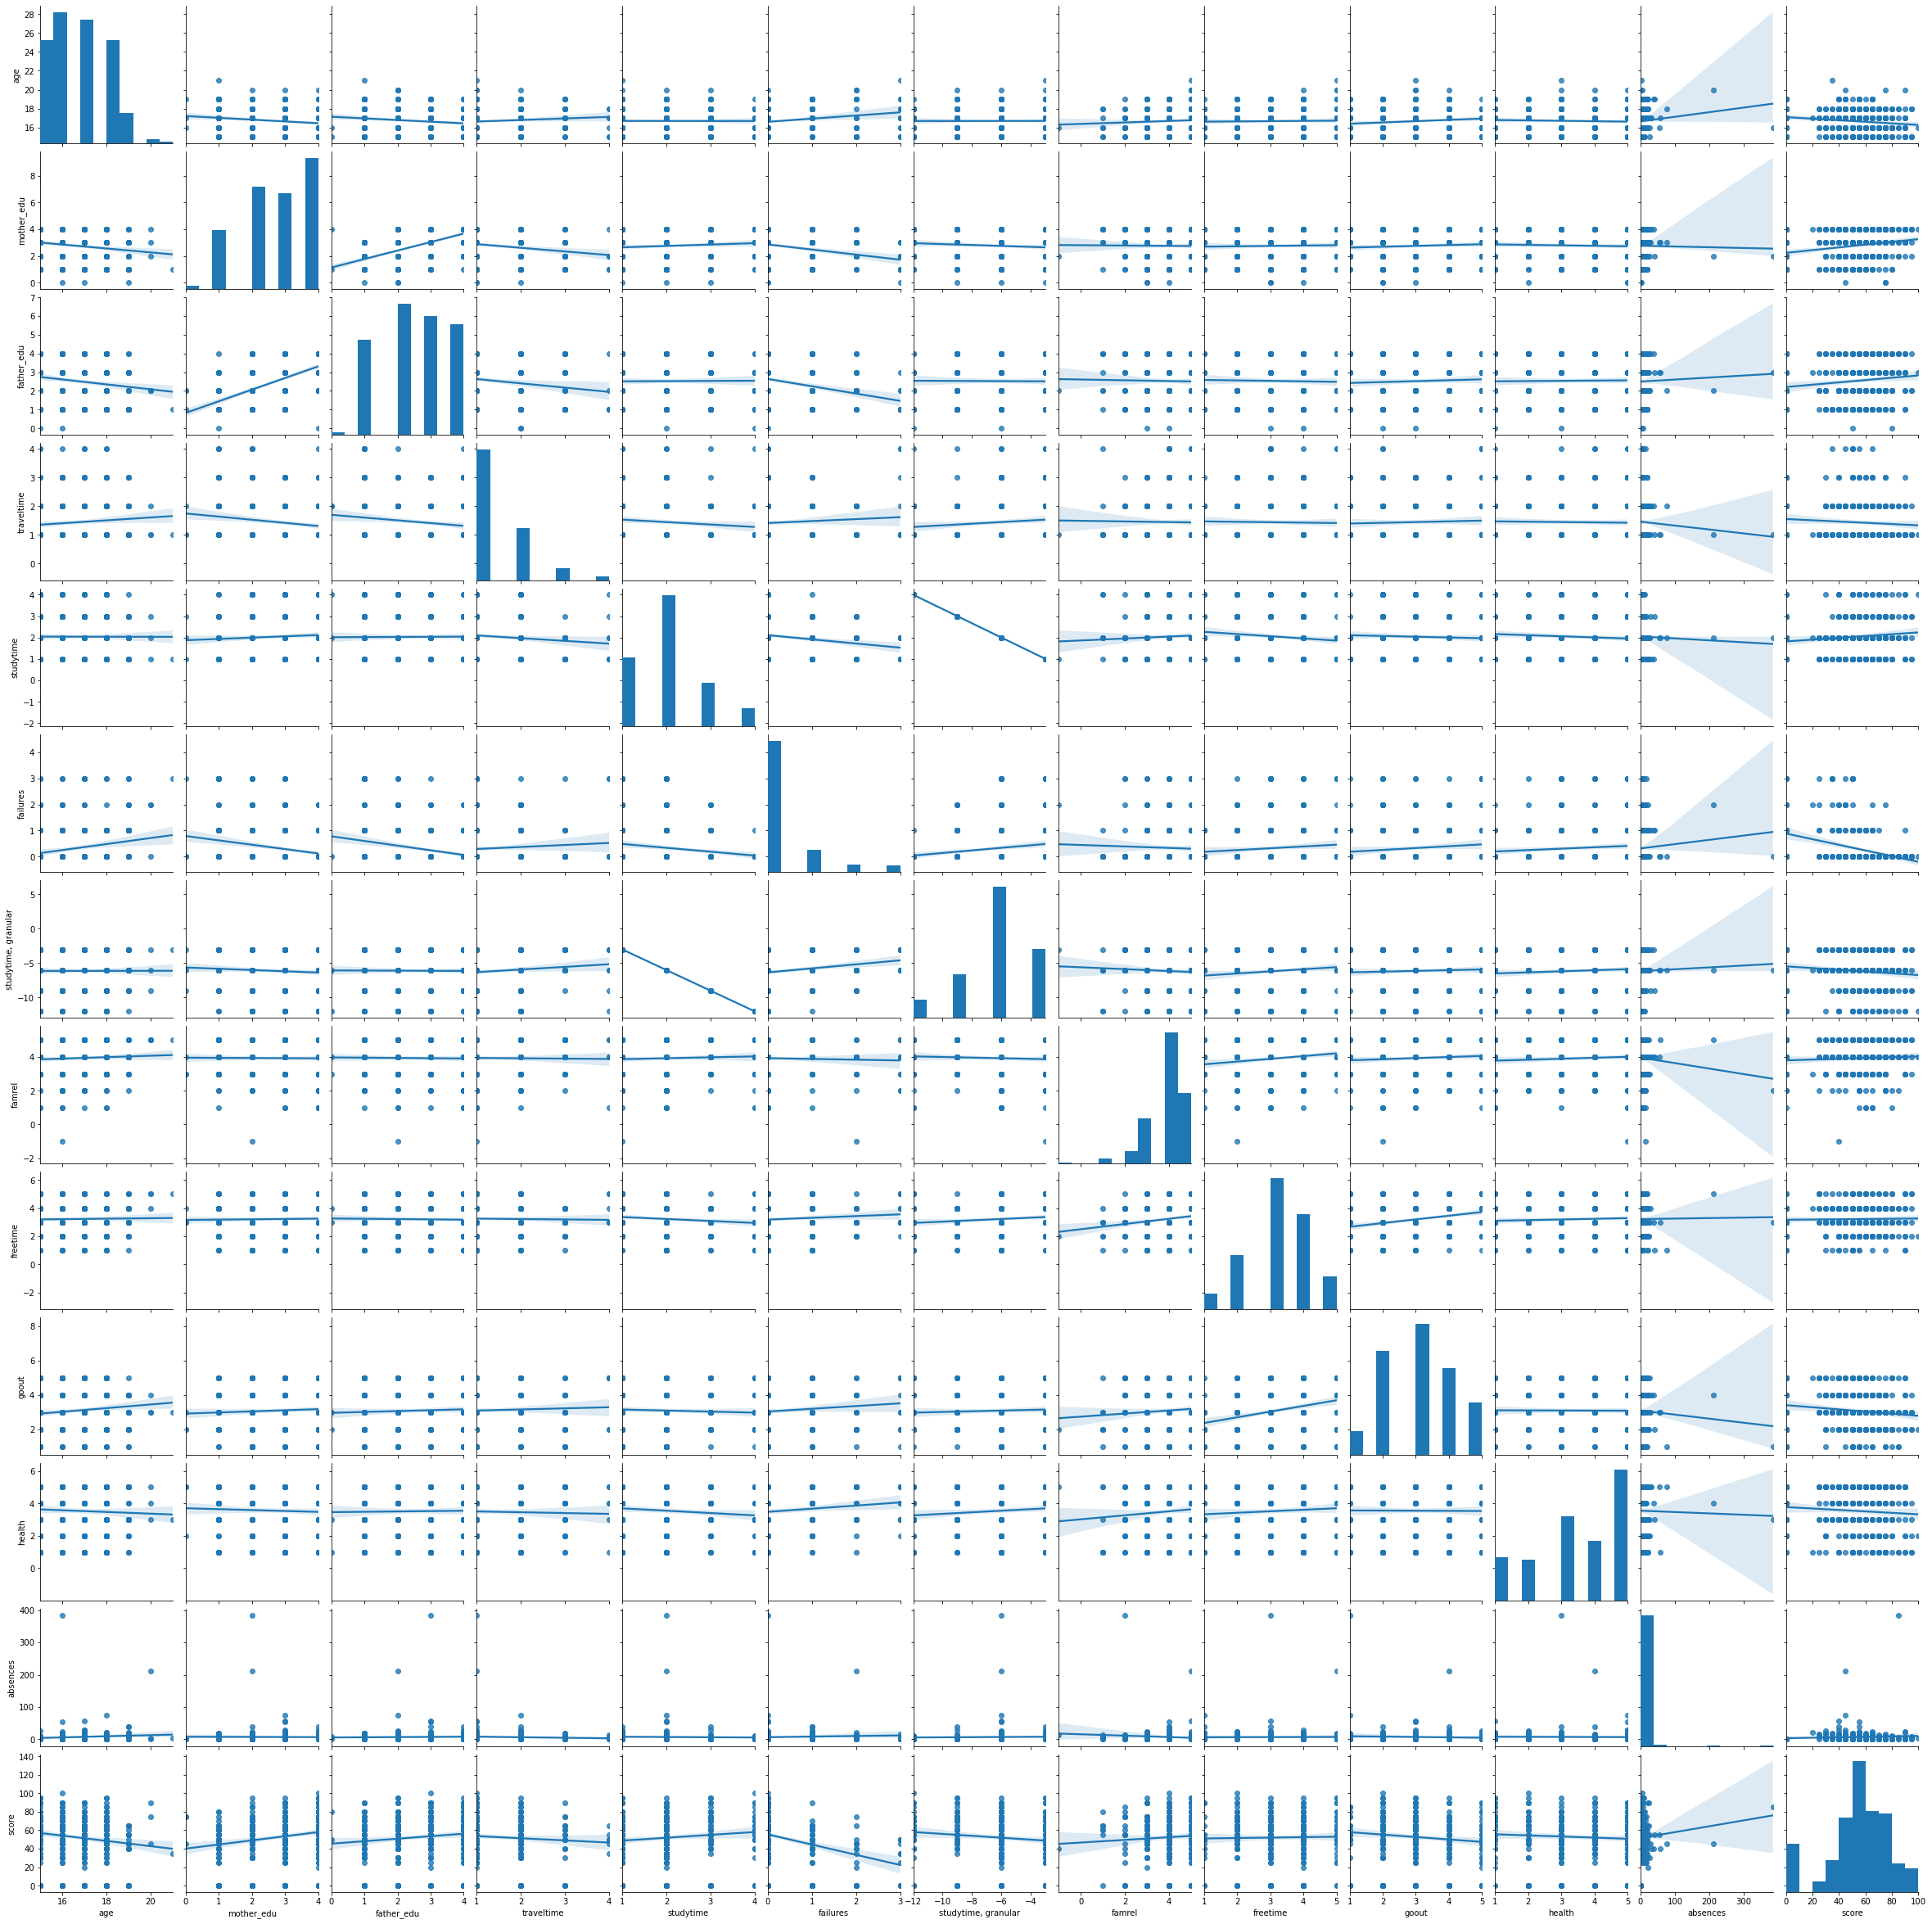

In [84]:
# Проанализируем корреляцию численных переменных
sns.pairplot(df, kind = 'reg')

In [87]:
df.corr()

,age,mother_edu,father_edu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.167883,-0.152024,0.090864,-0.002354,0.195891,0.002354,0.057357,0.021067,0.119997,-0.047402,0.091656,-0.153518
mother_edu,-0.167883,1.000000,0.628166,-0.173236,0.079484,-0.252250,-0.079484,-0.010786,0.024894,0.063415,-0.044241,-0.012162,0.213747
father_edu,-0.152024,0.628166,1.000000,-0.148477,0.008215,-0.264327,-0.008215,-0.018004,-0.022910,0.049637,0.016828,0.024032,0.129232
traveltime,0.090864,-0.173236,-0.148477,1.000000,-0.104661,0.072760,0.104661,-0.014720,-0.020609,0.040810,-0.024855,-0.047621,-0.071610
studytime,-0.002354,0.079484,0.008215,-0.104661,1.000000,-0.170081,-1.000000,0.050025,-0.119743,-0.046045,-0.086577,-0.025392,0.114325
failures,0.195891,-0.252250,-0.264327,0.072760,-0.170081,1.000000,0.170081,-0.035349,0.092434,0.106397,0.101967,0.054778,-0.345624
"studytime, granular",0.002354,-0.079484,-0.008215,0.104661,-1.000000,0.170081,1.000000,-0.050025,0.119743,0.046045,0.086577,0.025392,-0.114325
famrel,0.057357,-0.010786,-0.018004,-0.014720,0.050025,-0.035349,-0.050025,1.000000,0.173749,0.076198,0.083891,-0.083941,0.058966
freetime,0.021067,0.024894,-0.022910,-0.020609,-0.119743,0.092434,0.119743,0.173749,1.000000,0.294317,0.065776,0.008514,0.020147
goout,0.119997,0.063415,0.049637,0.040810,-0.046045,0.106397,0.046045,0.076198,0.294317,1.000000,-0.007277,-0.050634,-0.127788


Матрица корреляций не показывает присутствия серьезно скоррелированных с оценкой переменных, то есть мы не можем удалить ни одну из численных колонок без потерь. Присутствует полная обратная корреляция между studytime и studytime, granular. Последний столбец можно удалить из датафрейма.

Проанализирую номинативные переменные

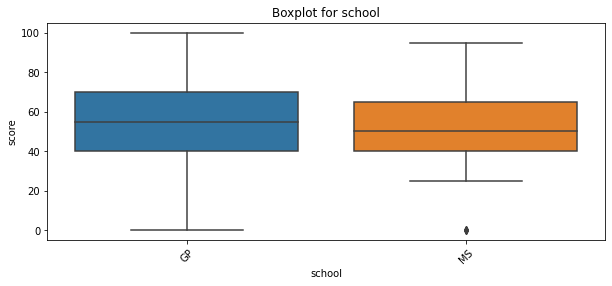

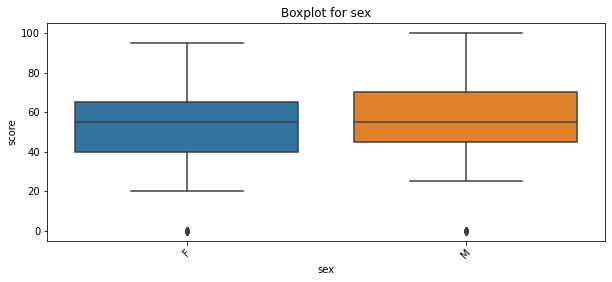

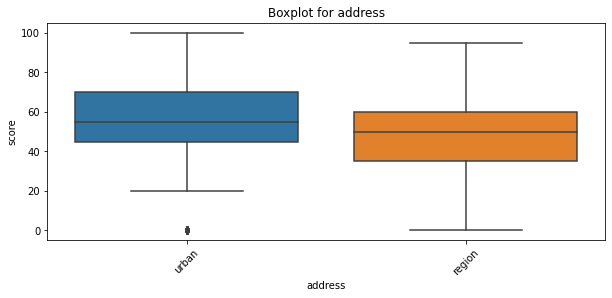

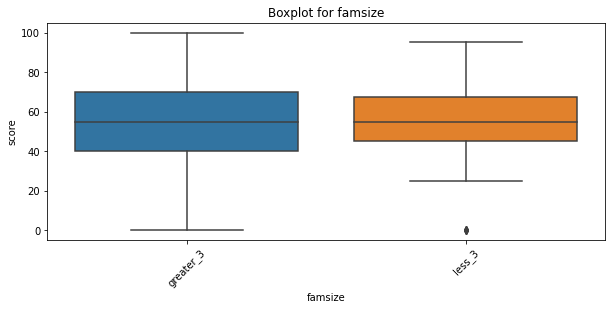

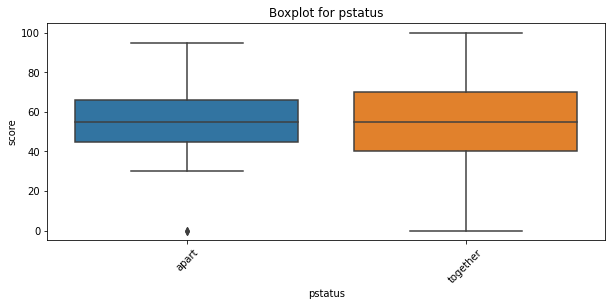

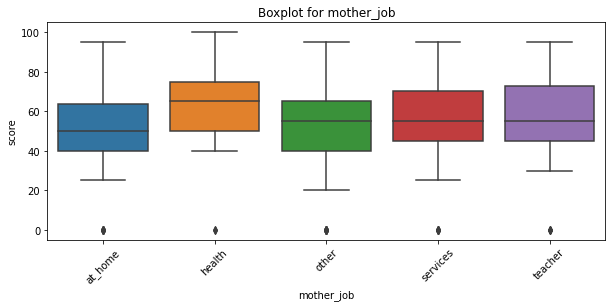

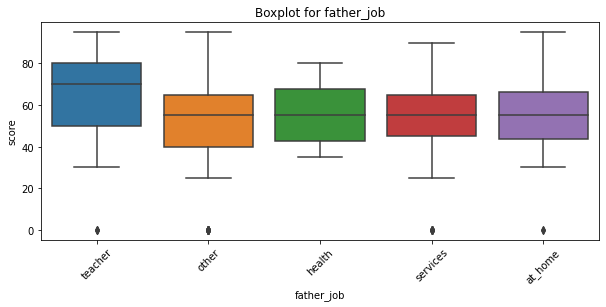

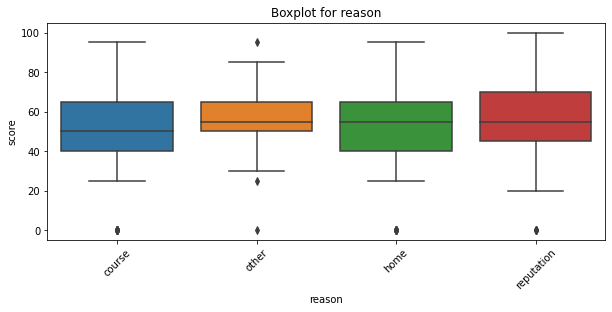

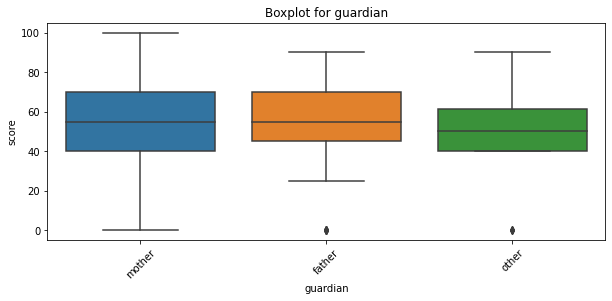

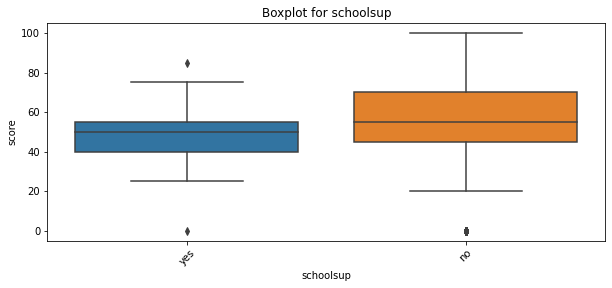

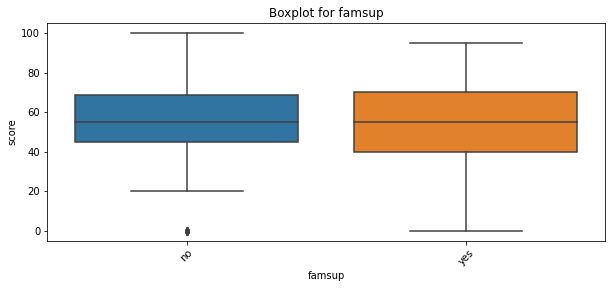

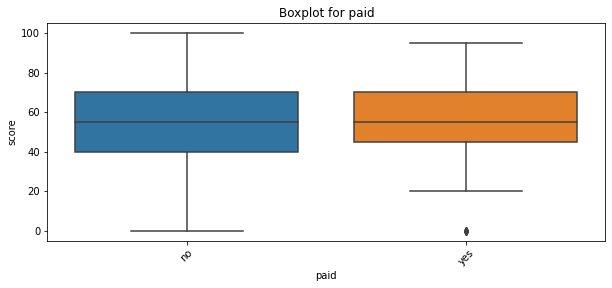

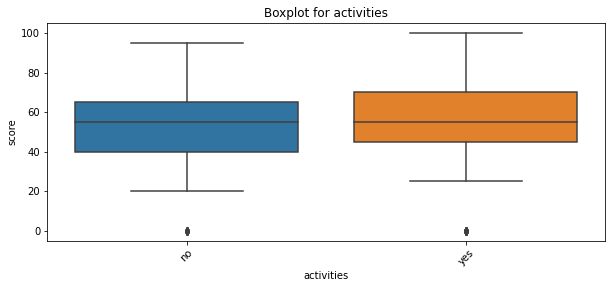

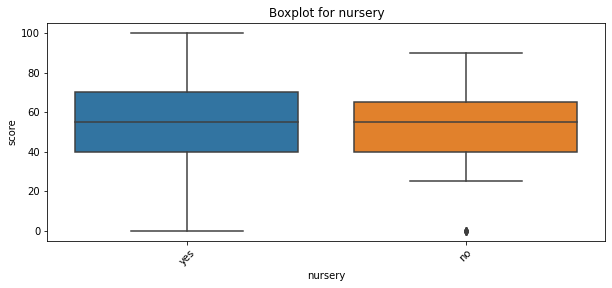

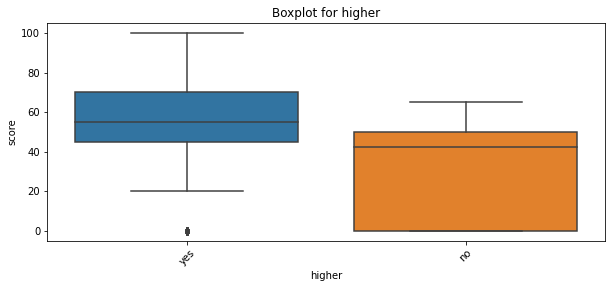

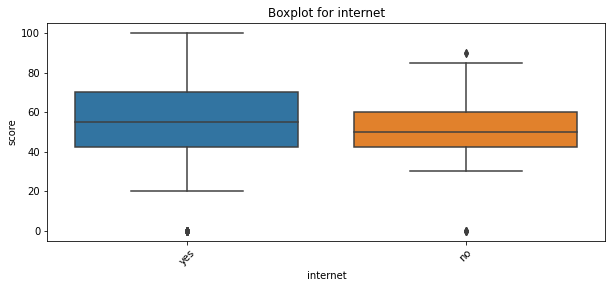

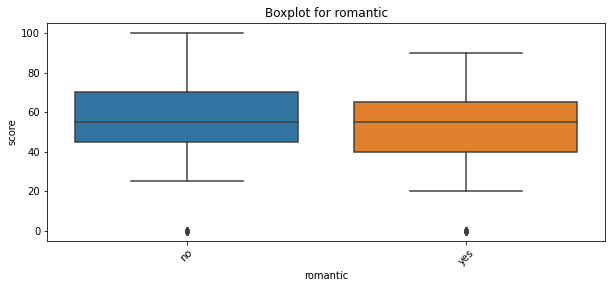

In [88]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (10, 4))
    sns.boxplot(x=column, y='score', 
                data=df)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mother_job', 'father_job', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)    

In [91]:
# создам копию датафрейма
stud_math1 = df.copy()

С помощью теста Стьюдента проверю нулевую гипотезу о том, что распределения оценки успеваемости по различным параметрам неразличимы:

In [94]:
def get_stat_dif(column):
    cols = stud_math1.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math1.loc[stud_math1.loc[:, column] == comb[0], 'score'], 
                        stud_math1.loc[stud_math1.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [95]:
for col in [
    'school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'mother_edu', 'father_edu',
                     'mother_job', 'father_job', 'reason', 'guardian', 'traveltime', 'studytime',
                     'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                     'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
                     'freetime', 'goout', 'health', 'absences', 'score'
]:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки mother_job
Найдены статистически значимые различия для колонки score


Серьёзно отличаются два параметра: mother_job и score. Оставим эти переменные в датасете для дальнейшего построения модели.

In [96]:
stud_math1_for_model = stud_math1.loc[:, ['mother_job', 'score']]
stud_math1_for_model.head()


,mother_job,score
0,at_home,30.0
1,at_home,30.0
2,at_home,50.0
3,health,75.0
4,other,50.0
